# Module 3 - Machine Learning for Classification 

### Using Logistic Regression for Churn Prediction

## Data Preparation

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O telco-churn.csv

--2025-11-05 08:09:03--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘telco-churn.csv’

telco-churn.csv     100%[===================>] 954.59K  --.-KB/s    in 0.009s  

2025-11-05 08:09:03 (102 MB/s) - ‘telco-churn.csv’ saved [977501/977501]



In [4]:
df=pd.read_csv('telco-churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns=df.columns.str.lower()

In [8]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

In [9]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

**because we replaced empty spaces of 'object' type with _,
there's an error when we try to convert totalcharges to numeric type
so we pass errors as 'coerce' to turn those erroneous entries to nan type**

In [11]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [12]:
df['totalcharges'].isnull().sum()

np.int64(11)

In [13]:
df['totalcharges']=df['totalcharges'].fillna(0)

In [14]:
df.churn = df.churn.str.replace('no','0').str.replace('yes','1').astype(int)

In [15]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

## Setting the Validation Framework using Scikit Learn 

**splitting the dataset to train, val and test using Scikit-Learn**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [21]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [22]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [23]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

## EDA 

**we're using df_full_train for exploratory data analysis** 

In [24]:
df_full_train=df_full_train.reset_index(drop=True)

In [25]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [27]:
(len(df_full_train[df_full_train.churn == 1])/len(df_full_train))*100

26.996805111821086

In [28]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [29]:
df_full_train.churn.mean() # because it sums all the 1's - 
#it's the same as % of rows where churn=1 

np.float64(0.26996805111821087)

In [30]:
global_churn_rate = round(df_full_train.churn.mean(),2)
global_churn_rate

np.float64(0.27)

In [31]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']
categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 
        'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 
        'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [33]:
df_full_train[categorical_features].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance : Churn Rate and Risk Ratio

In [34]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [35]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [36]:
df_full_train.partner.value_counts()


partner
no     2932
yes    2702
Name: count, dtype: int64

In [37]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner,churn_no_partner

(np.float64(0.20503330866025166), np.float64(0.3298090040927694))

In [38]:
global_churn_rate - churn_partner, global_churn_rate - churn_no_partner

(np.float64(0.06496669133974836), np.float64(-0.0598090040927694))

**i.e the partner feature is more important when considering the churn rate** 

1. Difference 

    GLOBAL - GROUP(FROM A FEATURE)
    
    if > 0 - less likely ot churn 
    
    if < 0 - more likely to churn 

**RISK RATIO**

In [39]:
churn_partner/global_churn_rate, churn_no_partner/global_churn_rate

(np.float64(0.7593826246675986), np.float64(1.22151482997322))

2. RISK RATIO 

   GROUP(FROM A FEATURE) / GLOBAL 
    
    if > 1 - more likely to churn 
    
    if < 1 - less likely to churn 

In [40]:
df_group=df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [41]:
from IPython.display import display

In [42]:
for c in categorical_features:
    df_group=df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    print(c)
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


**conclusion - it would be nice to have one variable that takes everything into account for each group and tells us its `importance`**

## Feature Importance: Mutual Information

In [43]:
# here mutual means churn with any other variable/feature - 
# so how much do we learn about churn if we observe values of another feature

In [44]:
 from sklearn.metrics import mutual_info_score

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [46]:
# the above uses a formula (that we don't need to get into now) - 
# to score two variables. 

In [47]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [48]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [49]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)
mi_score=df_full_train[categorical_features].apply(mutual_info_churn_score)

In [50]:
mi_score.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation

**the difference between mutual info and correlation is that the former is for catgorical features and the latter for numeric features**

Using **pearson correlation coefficient**

when the coefficient is positive -> if one var grows, the other grows too. 

when the coefficient is negative -> if one var grows, the other drops. 

0.0 - 0.1 / 0.0 - (-0.1) - LOW CORRELATION <br>
0.2 - 0.5 / (-0.2) - (-0.5) - MODERATE CORRELATION <br>
0.6 - 1 / (-0.6) - (-1) - STRONG CORRELATION <br>


In our case,<br>
x - feature/variable <br> 
y - binary variable

let's say x -> tenure, and y -> churn. 

In [51]:
df_full_train[numerical_features].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

with increase in tenure, there's less chance to churn 
<br>
similarly, when monthlycharges increases, there's less chance to churn (because there's a correlation between tenure and monthlycharges - people who've been with the telcom for longer have paid more in charges)

In [52]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [53]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [54]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

**as you can see - the longer the customer has stayed with the company, the less likely he is to churn - NEGATIVE CORRELATION** 

In [55]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [56]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [57]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

**here, it's clear that the more the monthly charge, the more likely customer is to churn - POSITIVE CORRELATION**

## ONE-HOT ENCODING 

encoding categorical variables 

the last time we did this by turning one variable/feature into many - ex. car number of doors were 2,3,4 so, we made columns num_of_doors_2 (1,0), num_of_doors_3 (1,0), num_of_doors4 (1,0). 

For this example, let's consider Gender + Contract combinations

In [58]:
df_full_train['contract'].value_counts()

contract
month-to-month    3104
two_year          1344
one_year          1186
Name: count, dtype: int64

and gender is M,F

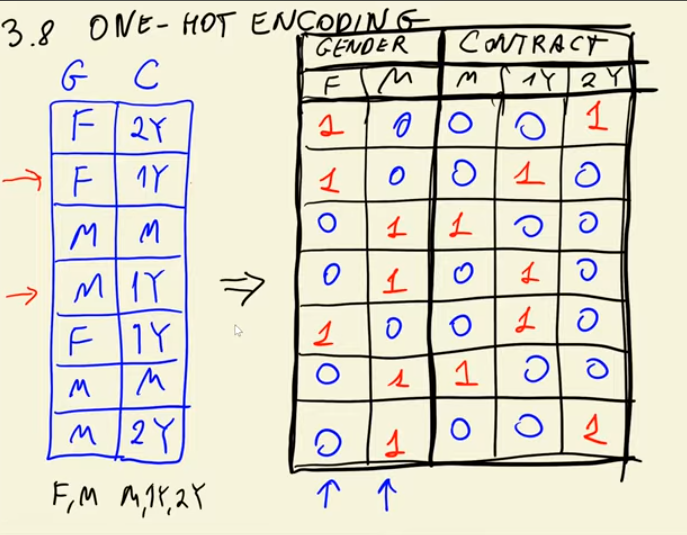

**the 'hot' is a reference to items that are '1'**

In [59]:
from sklearn.feature_extraction import DictVectorizer

In [60]:
train_dicts=df_train[categorical_features + numerical_features].to_dict(orient='records')

In [61]:
dv = DictVectorizer() #it's called vectorizer because we take a dictionary and turn it into a vector. 
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [62]:
dv.transform(train_dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 80275 stored elements and shape (4225, 45)>

> **_Note:_** look up sparse matrix <br>
> They're matrices that have a greater number of 0's and are sparesely filled with other numbers - generally used in ML(one-hot encoded features, TF-IDF vectors), graph algos, scientific computing


In [63]:
dv = DictVectorizer(sparse=False) 

# DictVectorizer converts a list of Py Dictionaries to a numeric feature matrix. 
# Each key in the dict becomes a column(feature)
# Each value becomes an entry in the column 
# Categorical/string values are automatically one-hot encoded 
# Numerical values are left as-is

# sparse=False returns a sparse matrix

dv.fit(train_dicts)


,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


<details>
<summary>DictVectorizer Summarized</summary>

---

## What is DictVectorizer?

`DictVectorizer` is a tool from **scikit-learn** that converts **lists of Python dictionaries** into **numeric matrices** that computers can understand.  

- Each dictionary represents a **data sample**.  
- Keys are **feature names** (like "city" or "temperature").  
- Values can be **categorical (strings)** or **numeric**.  

ML models **cannot understand strings**, so we need to convert everything into numbers.

---

## Step 1: Identify Features

Suppose you have this data:

```python
data = [
    {"city": "Paris", "temperature": 20},
    {"city": "London", "temperature": 15},
    {"city": "Berlin", "temperature": 17}
]
```
Numeric features → keep as-is (temperature)

Categorical features → turn into one-hot encoded columns: each unique value becomes a column

Columns after scanning:

Column Index	Feature Name
0	city=London
1	city=Paris
2	city=Berlin
3	temperature

## Step 2: Encode Each Sample

Numeric → put the value in the right column

Categorical → put 1 in the column corresponding to the value, 0 elsewhere

Sample	city=London	city=Paris	city=Berlin	temperature
1	0	1	0	20
2	1	0	0	15
3	0	0	1	17

This is the dense representation — all 0s and 1s are stored explicitly.


## Step 3: Dense vs Sparse Representation

Dense Matrix:

    - Stores every value, including zeros.
    - Good for small datasets.

Sparse Matrix:

    - Stores only the non-zero values and their positions.
    - Saves memory for large datasets with lots of zeros (common in one-hot encoding).

Example (sparse):

```sql
Row 0: column 1 = 1, column 3 = 20
Row 1: column 0 = 1, column 3 = 15
Row 2: column 2 = 1, column 3 = 17
```

This is stored in a Compressed Sparse Row (CSR) format internally.

## Step 4: Why Do We Use It?

Most ML models require numeric input.

DictVectorizer lets you quickly convert categorical + numeric features into a matrix ready for modeling.

Using sparse matrices saves memory and computation time for large datasets.

</details>

In [64]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [65]:
# dv.get_feature_names() - this was deprecated 

# now, it is get_feature_names_out()

In [66]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [67]:
X_train = dv.fit_transform(train_dicts)

# this is the same as dv.fit(train_dicts) then dv.transform(train_dicts)

**this is our FEATURE MATRIX now**

In [68]:
X_train.shape

(4225, 45)

In [69]:
val_dicts = df_val[categorical_features + numerical_features].to_dict(orient='records')

In [70]:
X_val = dv.transform(val_dicts)

**we don't do fit on validation dataset because fit() learns rules from data () <br>
incase of dictvectorizer, fit() scans the training data and figures out `what are all the features/columns?` + `what encoding to use for each feature?`<br> basically, it builds the rules for transforming data**

**transform() applies learned rules to data.**

**In case of validation datasets, we must use the same rules learned from training dataset cause 'fitting' on validation would give unrealistically good performance**

**Now, `dv.fit(train_dicts)`**

**fit() learns the feature mapping from the training data.<br>
It modifies the dv object in place.<br>
It does not return the transformed data, so there’s usually no need to assign it**
<br><br>
**`transform()` applies the mapping learned during fit().
<br>
It does not try to learn anything new.**




## Logistic Regression 


A refresher so far, 

**Supervised Learning**

    Definition: Learn a mapping from inputs → outputs using labeled data.

    Use: Predict outcomes based on past examples.

**Types & Examples:**

<br><Br>

**Regression** (Predict **continuous values**)

| Subtype | Description | Examples |
|---------|-------------|---------|
| 🟢 **Simple Linear Regression** | Predict one numeric target from one feature | House price vs. size |
| 🟢 **Multiple Regression** | Predict one numeric target from multiple features | Predict salary from experience, education, location |
| **Polynomial Regression** | Fit a non-linear relationship | Predict growth trends |
| 🟢 **Regularized Regression** | Avoid overfitting by penalizing coefficients | Ridge, Lasso |

---
<br><Br>
**Classification** (Predict **categorical labels**)

| Subtype | Description | Examples |
|---------|-------------|---------|
| 🟢 **Binary Classification** | Two classes (0/1, yes/no) | Spam vs. not spam, Disease vs. Healthy |
| **Multi-Class Classification** | More than two classes, each sample belongs to **exactly one class** | Handwritten digits 0–9, Animal type |
| **Multi-Label Classification** | Each sample can belong to **multiple classes simultaneously** | News categories, Music genres |
| **Imbalanced Classification** | Classes have very different frequencies | Fraud detection, Rare disease prediction |

**Note:** Logistic Regression is technically a regression method mathematically, but when applied to categorical outputs it’s used for **binary or multi-class classification**.

---

### **Summary Table**

| Task Type | Output Type | Common Subtypes |
|-----------|------------|----------------|
| Regression | Continuous | Simple, Multiple, Polynomial, Regularized |
| Classification | Discrete / Categorical | Binary, Multi-Class, Multi-Label, Imbalanced |

### RIGHT NOW, WE'RE LOOKING AT BINARY CLASSIFICATION

g(x<sub>i</sub>) = w0 + w<sup>t</w>x<sub>i</sub>

**linear regression outputs a number between -inf to inf (real numbers)
and logistic regression outputs a number between 0,1**

it uses a special func called SIGMOID i.e, SIGMOID(w0 + w<sup>t</w>x<sub>i</sub>)

In [71]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [72]:
z = np.linspace(-7,7,51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [73]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

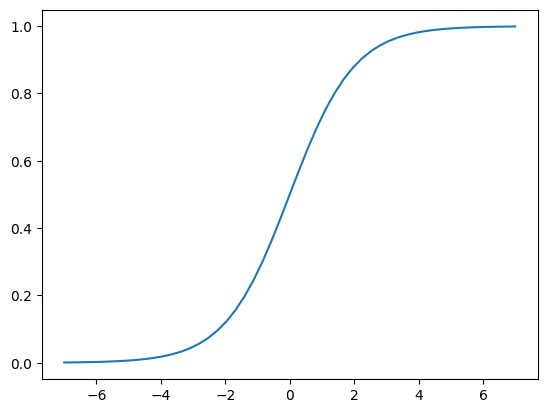

In [74]:
plt.plot(z,sigmoid(z))

In [75]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j]*w[j]
    return result    

In [76]:
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j]*w[j]
    result = sigmoid(score)
    return result

## Training Logistic Regression with Scikit-Learn

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()
model.fit(X_train,y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

**the above is w - weight vector**

In [80]:
model.intercept_[0]


np.float64(-0.10913176644533581)

**intercept gives w0 - the bias term**

In [81]:
model.predict(X_train) # hard prediction

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [82]:
model.predict_proba(X_train) # soft prediction

array([[0.90416494, 0.09583506],
       [0.3210407 , 0.6789593 ],
       [0.36668394, 0.63331606],
       ...,
       [0.46853433, 0.53146567],
       [0.9576116 , 0.0423884 ],
       [0.30173516, 0.69826484]], shape=(4225, 2))


i.e the customer corresponding to the first row of our 
train dataset has 90.4% of no-churn probability 
and 9.6% possibility of churning


In [83]:
print(model.classes_)


[0 1]


**COLUMN 0 - CORRESPONDS TO  NO-CHURN <br>
COLUMN 1 - CORRESPONDS TO CHURN**

In [84]:
#y_pred =model.predict_proba(X_train)[:,1]

In [85]:
y_pred =model.predict_proba(X_val)[:,1]

In [86]:
churn_decision = (y_pred >= 0.5)

In [87]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

**the above will result in a column of customer's that are more likely to churn - so we target them for promotional emails, offers etc**

**now let's check how accurate our predictions are**

**the RMSE equivalent in logistic regression is 'accuracy**


In [88]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [89]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [90]:
(y_val == churn_decision.astype(int)).mean()

np.float64(0.8034066713981547)

In [91]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [92]:
df_pred['cor'] = df_pred.prediction == df_pred.actual

In [93]:
df_pred

,probability,prediction,actual,cor
0,0.009001,0,0,True
1,0.204090,0,0,True
2,0.211725,0,0,True
3,0.542751,1,1,True
4,0.213315,0,0,True
...,...,...,...,...
1404,0.313144,0,0,True
1405,0.039347,0,1,False
1406,0.136351,0,0,True
1407,0.799424,1,1,True


In [94]:
df_pred.cor.mean()

np.float64(0.8034066713981547)

 ## Model Interpretation

In [95]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [96]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.071,  0.   ])

In [97]:
a=[1,2,3,4]
b=['a','b','c','d']
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [98]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [99]:
small = ['contract', 'tenure', 'monthlycharges']

In [100]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [101]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [102]:
dv_small = DictVectorizer(sparse=False)

In [103]:
dv_small.fit_transform(dicts_train_small)
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [104]:
X_train_small = dv_small.fit_transform(dicts_train_small)

In [105]:
X_val_small = dv_small.transform(dicts_val_small)

In [106]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
w0=model_small.intercept_[0] 
w0

np.float64(-2.477957595284362)

**`intercept_` and `coef_` are capable of handling multiclass problems that's why more than one index/item - in this case, because it's binary classification len(model.coef_) and len(model.intercept_) is 1**

In [108]:
w=model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [109]:
model_small.coef_

array([[ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005]])

In [110]:
dict(zip(dv_small.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'monthlycharges': np.float64(-0.03),
 'tenure': np.float64(-0.078)}

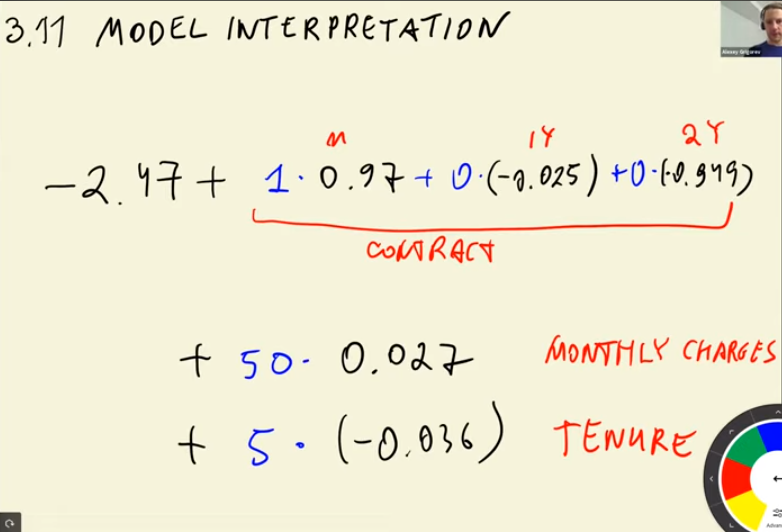

considering one customer - let's say he's on a monthly contract + he's paying 50 dollars a month, and has been with the company for 5 years

In [111]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

the bias term is what we assume without knowledge 
so, here, by default, the probability of someone leaving the company will be 7% 

In [112]:
sigmoid(-2.47 + 0.97 + 50*0.027 - 5*0.036) 

np.float64(0.41824062315816374)

In [113]:
# the -ve number indicated negative correlation - i.e the var value increases, and churn decreases

In [114]:
-2.47 + 0.97 + 50*0.027 - 5*0.036

-0.3300000000000001

In [115]:
sigmoid(_) # underscore takes the output of the last cell in jupyter

np.float64(0.41824062315816374)

In [116]:
-2.47 + 0.97 + 60*0.027 - 1*0.036 # tenure of 1 month+ paying 60 dollars per month

0.08399999999999966

In [117]:
sigmoid(_)

np.float64(0.5209876607065322)

In [118]:
# higher chances of churning now ^^

## Using the Model 

In [119]:
dicts_full_train = df_full_train[categorical_features + numerical_features].to_dict(orient='records')

# from df we get dicts - from dicts we get feature matrix - 
# then we train a model on the feature matrix 
# then we repeat for test
# this is how we get predictions
# complete accuracy


In [120]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [121]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [122]:
y_full_train = df_full_train.churn.values

**You remove the target (in this case, `churn`) only when you’re actively training or validating a model. You keep it in `df_full_train` until you’re ready to use that dataset for final training.**

In [123]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [124]:
# now repeat the above for test dataset 

In [125]:
dicts_test = df_test[categorical_features + numerical_features].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [126]:
y_pred = model.predict_proba(X_test)[:,1]

In [127]:
churn_decision = (y_pred >= 0.5)

In [128]:
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)

In [129]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [130]:
customer = dicts_test[10]

Earlier, when you trained + validated separately, you removed churn only from df_train and df_val temporarily (to feed into the model as X_train and X_val).

But you didn’t remove it from df_full_train, because later you needed:

y_full_train = df_full_train.churn.values

<u>to train your final model on all labeled data before testing.</u>

**Analogy:**

Imagine teaching a student (the model) with a study guide (features).
If you don’t tell them the correct answers (the target), they can’t actually learn what’s right or wrong.


So in short:

**You keep churn in df_full_train because it’s the true answer your model learns from during final training.**

In [131]:
X_customer = dv.transform([customer]) 
X_customer.shape

(1, 45)

In [132]:
model.predict_proba(X_customer)[0,1]

np.float64(0.4979548499430508)

In [133]:
# ^^ here has only 49% chance of churning - <0.5 so we say he's not churning.

In [134]:
y_test[10]

np.int64(0)

**i.e he didnot churn**

In [135]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [136]:
X_customer = dv.transform([customer]) 
model.predict_proba(X_customer)[0,1]

np.float64(0.6546648535787962)

**because >50% - she will churn**

In [137]:
y_test[-1]

np.int64(1)

**1 says she will churn**

In [138]:
# so our model works - we will send promotional emails to customer -1

# MODULE - 4 

## 4.2 Accuracy and Dummy Model

In [139]:
len(y_val)

1409

In [140]:
(y_val == churn_decision).sum()

np.int64(868)

In [141]:
accuracy = (y_val == churn_decision).sum() / len(y_val)

In [142]:
accuracy

np.float64(0.6160397444996452)

In [143]:
thresholds = np.linspace(0,1,21)

In [144]:
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [146]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)

In [147]:
scores

[np.float64(0.2739531582682754),
 np.float64(0.40525195173882184),
 np.float64(0.45209368346344925),
 np.float64(0.48119233498935415),
 np.float64(0.5074520936834634),
 np.float64(0.5330021291696239),
 np.float64(0.5408090844570618),
 np.float64(0.5613910574875799),
 np.float64(0.57416607523066),
 np.float64(0.5933286018452804),
 np.float64(0.6160397444996452),
 np.float64(0.6252661462029808),
 np.float64(0.6472675656493967),
 np.float64(0.674237047551455),
 np.float64(0.6933995741660752),
 np.float64(0.709013484740951),
 np.float64(0.7196593328601846),
 np.float64(0.7253371185237757),
 np.float64(0.7260468417317246),
 np.float64(0.7260468417317246),
 np.float64(0.7260468417317246)]

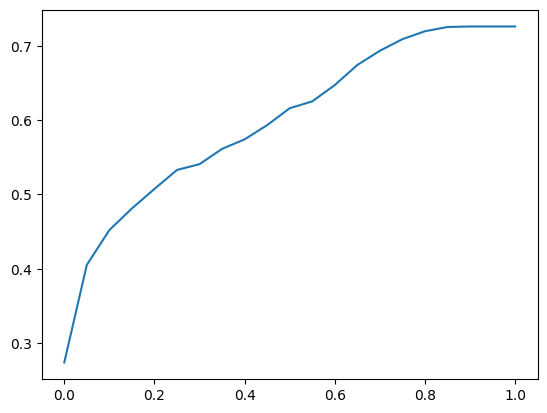

In [148]:
plt.plot(thresholds, scores)

## 4.3 Confusion Table

**false and true positives and negatives**

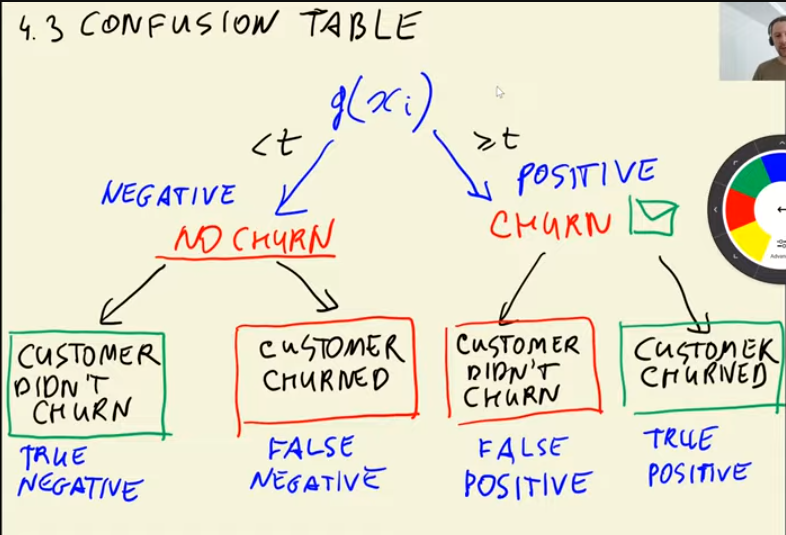

In [149]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [150]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [151]:
predict_positive[:5]

array([False, False, False, False, False])

In [152]:
actual_positive[:5]

array([False, False, False,  True, False])

In [153]:
predict_positive & actual_positive # a combined array that is TRUE only if both are TRUE

array([False, False, False, ..., False, False,  True], shape=(1409,))

In [154]:
true_positive = (predict_positive & actual_positive).sum()
true_negative = (predict_negative & actual_negative).sum()

false_positive = (predict_positive & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()

In [155]:
false_positive, false_negative

(np.int64(239), np.int64(302))

In [156]:
confusion_matrix =  np.array([[true_negative, false_positive], [false_negative, true_positive]])

In [157]:
confusion_matrix

array([[784, 239],
       [302,  84]])

**239 - people who are not going to churn but get the promotional emails (telcom loses money)
<br>
302 - people who are going to churn but do not get promotional emails (telcom loses clients)**

In [158]:
confusion_matrix / confusion_matrix.sum()

array([[0.556423  , 0.16962385],
       [0.21433641, 0.05961675]])

**55.6% + 5.9% = accuracy = 61.5%**

## 4.4 Precision & Recall 

these are metrics for evaluating binary classification models

**PRECISION : FRACTION OF POSITIVE PREDICTIONS THAT ARE CORRECT**

 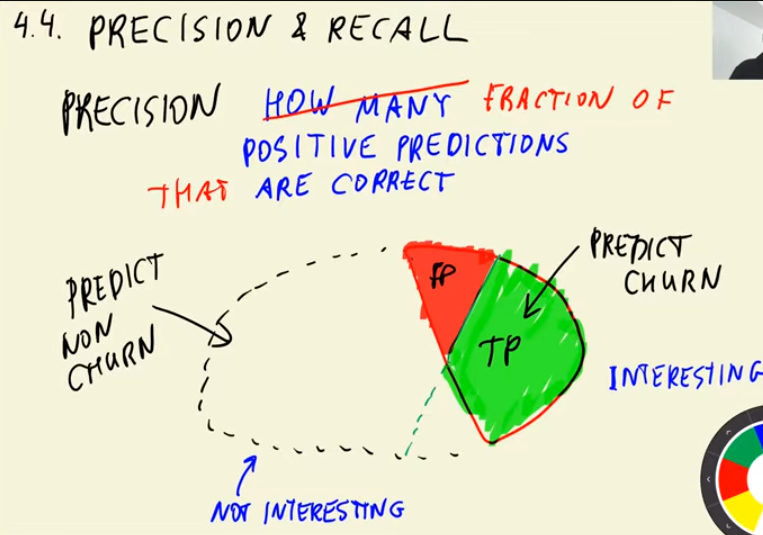

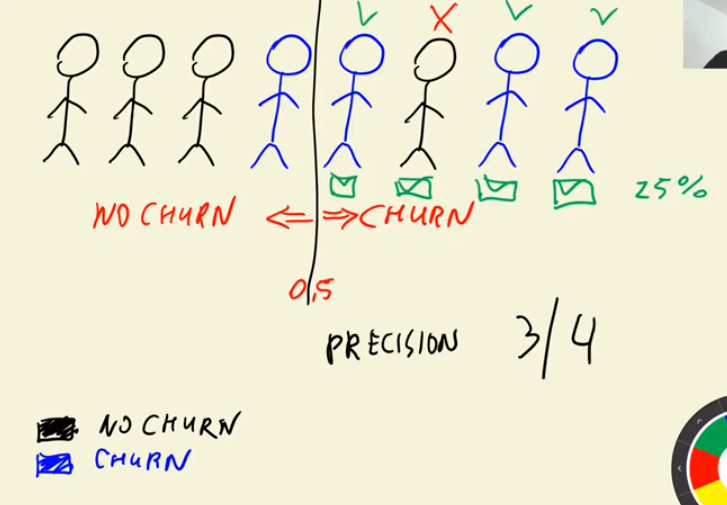

#### Precision = True Positive / (True Positive + False Positive)

In [159]:
precision = true_positive / (true_positive + false_positive)

In [160]:
precision

np.float64(0.26006191950464397)

In [161]:
total_positive = true_positive + false_positive # promotional emails go to both

In [162]:
total_positive, precision * total_positive # only this percent is the actual churn %

(np.int64(323), np.float64(84.0))

**RECALL: FRACTION OF CORRECTLY IDENTIFIED POSITIVE EXAMPLES**

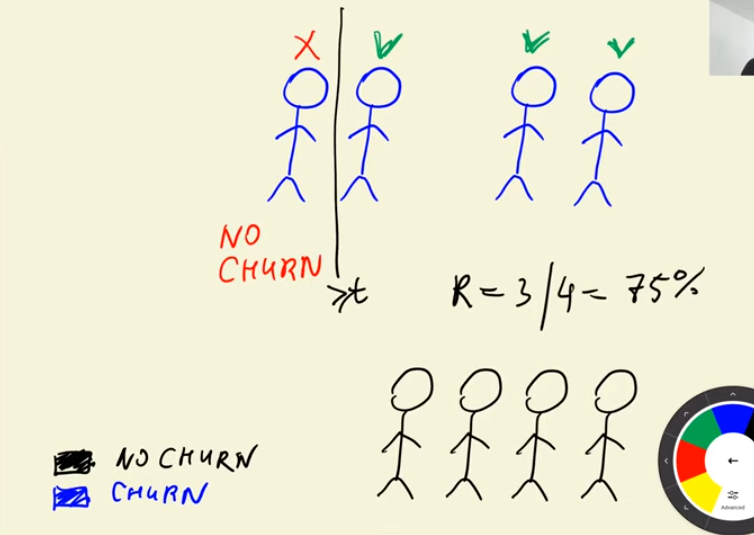 

#### Recall = True Positive / (True Positive + False Negative)

In [163]:
recall = true_positive / (true_positive + false_negative)

In [164]:
recall

np.float64(0.21761658031088082)

In [165]:
true_positive + false_negative

np.int64(386)

**i.e accuracy can be misleading - that's why we also look at precision and recall**

## ROC Curves

**A ROC curve is a graphical plot that shows the performance of a binary classifier system at various threshold values by plotting the true positive rate (sensitivity) against the false positive rate (1-specificity)**

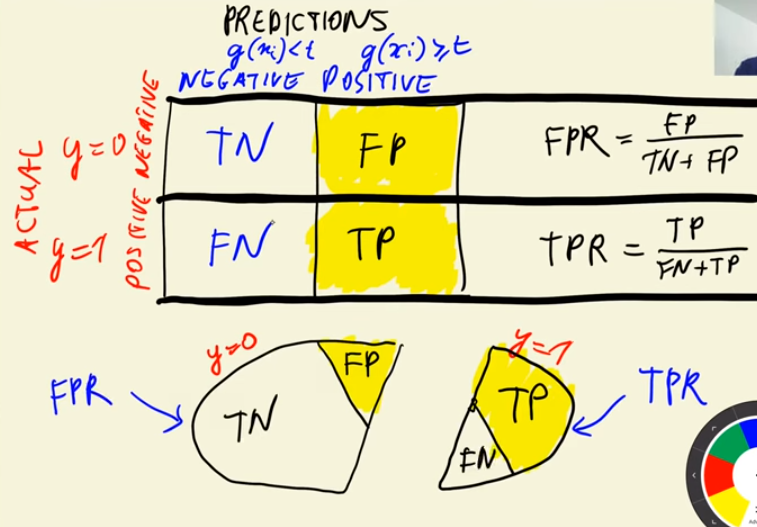

In [166]:
true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_negative + true_positive)

In [167]:
true_positive_rate

np.float64(0.21761658031088082)

In [168]:
recall

np.float64(0.21761658031088082)

In [169]:
false_positive_rate

np.float64(0.6191709844559585)

In [170]:
thresholds = np.linspace(0,1,101)

In [171]:
scores = []
for t in thresholds:
    actual_positive = (y_val==1)
    actual_negative = (y_val==0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t,tp,fp,tn,fn))

In [172]:
columns = ['threshold', 'tp', 'fp', 'tn', 'fn']
df_scores = pd.DataFrame(scores, columns = columns)

In [173]:
df_scores[::10]

,threshold,tp,fp,tn,fn
0,0.0,386,1023,0,0
10,0.1,247,633,390,139
20,0.2,180,488,535,206
30,0.3,135,396,627,251
40,0.4,109,323,700,277
50,0.5,84,239,784,302
60,0.6,51,162,861,335
70,0.7,29,75,948,357
80,0.8,2,11,1012,384
90,0.9,0,0,1023,386


In [174]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [175]:
df_scores[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,247,633,390,139,0.639896,0.618768
20,0.2,180,488,535,206,0.466321,0.477028
30,0.3,135,396,627,251,0.349741,0.387097
40,0.4,109,323,700,277,0.282383,0.315738
50,0.5,84,239,784,302,0.217617,0.233627
60,0.6,51,162,861,335,0.132124,0.158358
70,0.7,29,75,948,357,0.075130,0.073314
80,0.8,2,11,1012,384,0.005181,0.010753
90,0.9,0,0,1023,386,0.000000,0.000000


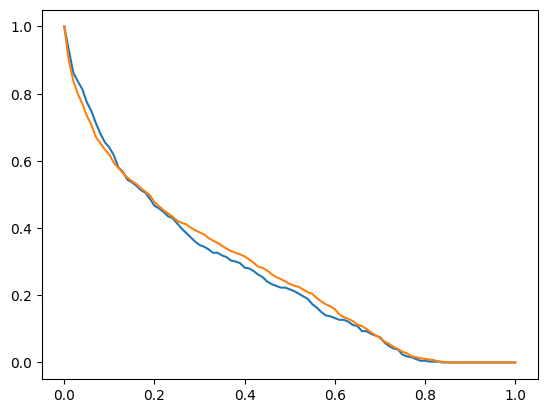

In [176]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')

### Random Model 

In [177]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02], shape=(1409,))

In [178]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [179]:
def tpr_fpr_df(y_val, y_pred):
    scores = []
    
    thredholds = np.linspace(0,1,101)
    
    for t in thresholds:
        actual_positive = (y_val==1)
        actual_negative = (y_val==0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t,tp,fp,tn,fn))

    columns = ['threshold', 'tp', 'fp', 'tn', 'fn']
    df_scores = pd.DataFrame(scores, columns = columns) 

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [180]:
df_rand = tpr_fpr_df(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,100,39,0.898964,0.902248
20,0.2,307,822,201,79,0.795337,0.803519
30,0.3,276,724,299,110,0.715026,0.707722
40,0.4,237,624,399,149,0.613990,0.609971
50,0.5,202,518,505,184,0.523316,0.506354
60,0.6,161,409,614,225,0.417098,0.399804
70,0.7,121,302,721,265,0.313472,0.295210
80,0.8,78,206,817,308,0.202073,0.201369
90,0.9,40,101,922,346,0.103627,0.098729


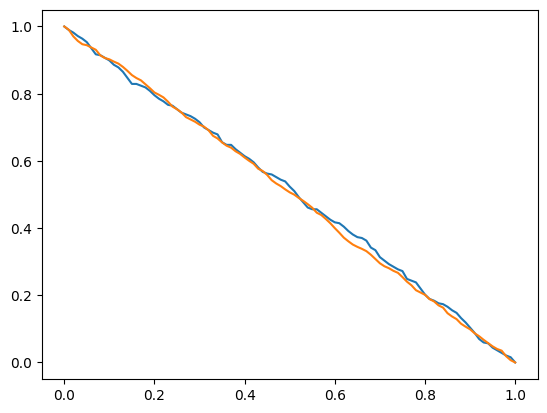

In [181]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR') # X-aixs - threshold, Y-axis - tpr/fpr
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')

### Ideal Model

In [182]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [183]:
y_ideal = np.repeat([0,1], [num_neg,num_pos])

In [184]:
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [185]:
y_ideal_pred = np.linspace(0,1,len(y_val))

In [186]:
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [187]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [188]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [189]:
df_ideal = tpr_fpr_df(y_ideal, y_ideal_pred)

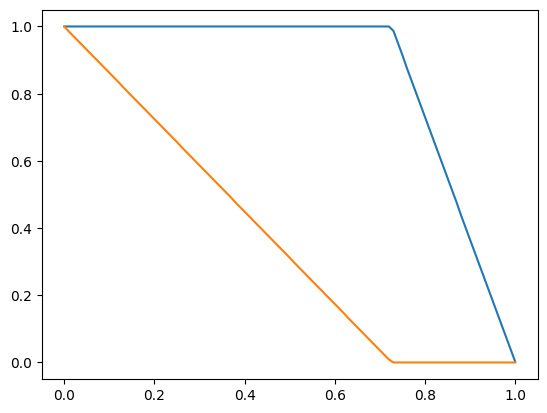

In [190]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')

Text(0, 0.5, 'tpr')

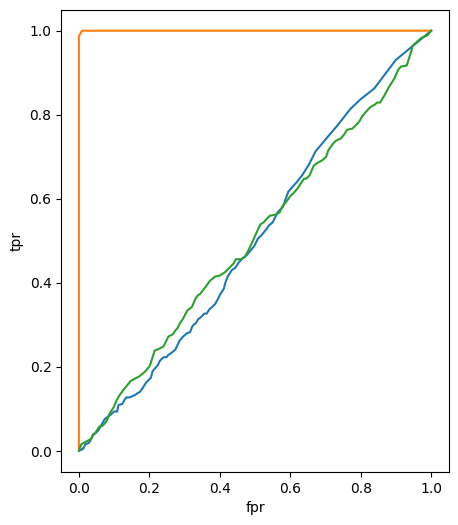

In [191]:
plt.figure(figsize=(5,6))

plt.plot(df_scores.fpr, df_scores['tpr'], label = 'model')
plt.plot(df_ideal.fpr, df_ideal['tpr'], label = 'ideal')
plt.plot(df_rand.fpr, df_rand['tpr'], label = 'random')

plt.xlabel('fpr')
plt.ylabel('tpr')

In [192]:
from sklearn.metrics import roc_curve


In [194]:
fpr, tpr, thresholds = roc_curve(y_val,y_pred)

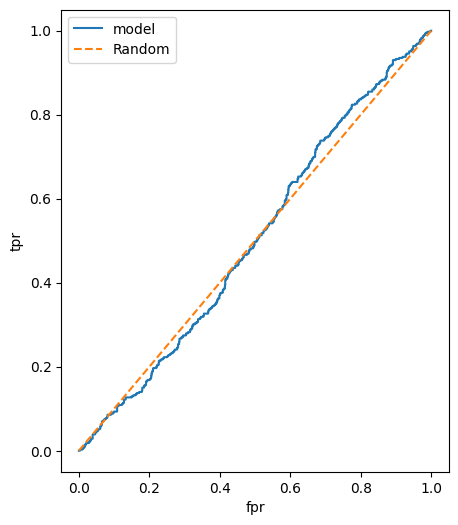

In [197]:
plt.figure(figsize=(5,6))

plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label='Random', linestyle='--')

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.legend()

#### the closer our model to the ideal the better - more curved towards the ideal model - less deviation (alignment to fpr)

#### in the ideal model - tpr goes straight up until 1 - i.e there are no false positives predicted. 

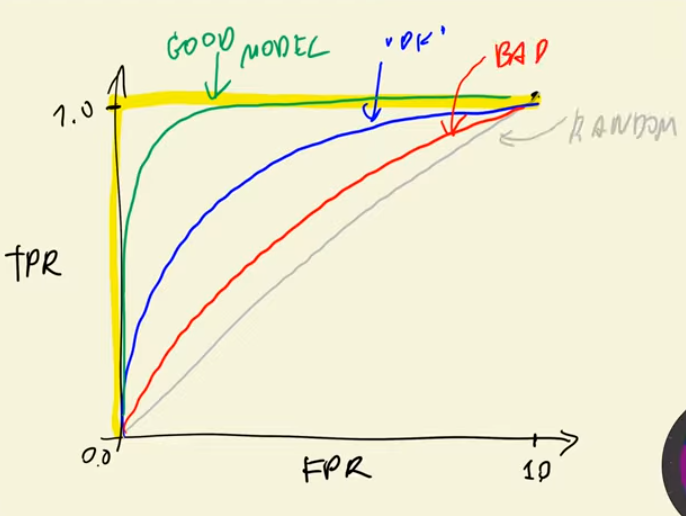

### ROC AUC - is area under the curve - derived from the ROC - we'll be looking at this next

In [199]:
from sklearn.metrics import auc

In [200]:
auc(fpr,tpr)

0.502488110251774

In [201]:
auc(df_scores.fpr, df_scores.tpr)

0.5025754790087065

In [202]:
auc(df_rand.fpr, df_rand.tpr)

0.5060233793728696

auc(df_ideal.fpr, df_ideal.tpr)

In [205]:
from sklearn.metrics import roc_auc_score

In [206]:
roc_auc_score(y_val, y_pred)

0.502488110251774

- **roc_auc_score()** computes the AUC directly from the true labels and predicted scores or probabilities.

- **auc()** computes the AUC from the false positive rates (FPR) and true positive rates (TPR) which are derived from the predicted scores and true labels using the roc_curve() function.
Both functions aim to calculate the area und

## Cross-Validation

**K-fold validation - splitting df_full_train into k parts.**

If k = 3, 

then full train is split into 3 parts

first we take 1,2 for train and 3 for validation, (auc3)<br>
then, we take 1,3 for train and 2 for valdation, (auc2)<br>
similaryly, we take 2,3 for train and 1 for validation. (auc1)<br> 

33% of data is used here for Validation dataset. 

we compute auc for each category above - then also caluclate mean and std of the auc

In [232]:
def train(df,y, C=1.0):
    dicts = df[categorical_features + numerical_features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv,model

In [233]:
dv, model = train(df_train, y_train, C=0.01)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [234]:
def predict(df, dv, model):
    dicts = df[categorical_features + numerical_features].to_dict(orient='records')

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [235]:
y_pred = predict(df_val, dv, model)

In [236]:
from sklearn.model_selection import KFold 

In [237]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x71c0e27acae0>

In [238]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [239]:
len(train_idx), len(val_idx)

(5070, 564)

In [240]:
len(df_full_train)

5634

In [241]:
!pip install tqdm 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [242]:
from tqdm.auto import tqdm

In [248]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [250]:
n_splits = 5

for C in tqdm([0.001,0.01, 0.1, 0.5, 1, 5, 10]) :
    scores = []
    
    kflod = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append(auc)
    print('%s -> %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

0.001 -> 0.826 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

0.01 -> 0.841 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

0.1 -> 0.842 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

0.5 -> 0.843 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

1 -> 0.843 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

5 -> 0.843 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

10 -> 0.843 +- 0.012


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
scores

[0.8498640332045226,
 0.8425123762376238,
 0.8582628772652525,
 0.8333388198502182,
 0.8246277915632754,
 0.8413586413586414,
 0.8430153044610876,
 0.8253874130297281,
 0.845827775307544,
 0.8614332291351552]

In [252]:
# now training model on full_train dataset - based on the mean scores above, the best C is 1

dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

ValueError: Found input variables with inconsistent numbers of samples: [5634, 5071]

## Summary 

- Metric - a single number that describes the performance of a model
- Accuracy - fraction of correct answers; sometimes misleading
- Confusion Table - A confusion matrix (or confusion table) helps you see exactly how your model’s predictions compare to the true labels — especially useful when classes are imbalanced.
- Precision and Recall are less misleading when we have class imbalance
- ROC Curve - a way to evaluate the performance at all threholds; okay to use with imbalance
- K-Fold CV - more reliable estimate for performance (mean +  std)

`Class imbalance` happens when the classes (categories) in your dataset are not represented equally — that is, one class has many more examples than another.

For example:

    In a spam detection dataset, 95% of emails might be “not spam” and only 5% “spam.”
    
    In a fraud detection dataset, 99.9% of transactions might be legitimate and only 0.1% fraudulent.

Why it matters:

When there’s class imbalance:

    A model can get high accuracy just by predicting the majority class all the time.
    
    e.g., if 99% of data is “not spam,” a model that always says “not spam” is 99% accurate — but useless.
    
    Metrics like accuracy and even ROC–AUC can be misleading because they don’t focus on the rare (minority) class performance.

Better metrics in imbalanced settings:

    Precision and Recall: Focus on how well the model identifies the minority class.
    
    F1-score: Harmonic mean of precision and recall.
    
    PR Curve (Precision–Recall Curve): Gives a clearer picture of performance when classes are imbalanced.